In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

plt.rcParams["figure.figsize"] = (10, 4)

In [8]:
vol = pd.read_csv(
    "data/processed/volatility_target.csv",
    parse_dates=["Date"],
    index_col="Date"
)

vol.head(30)

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


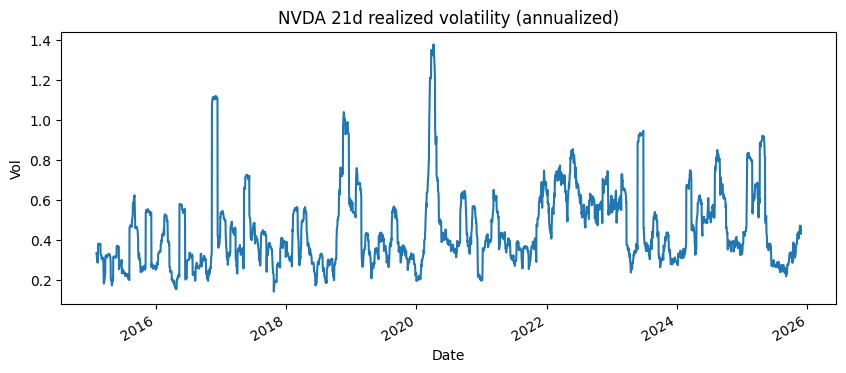

In [9]:
ticker = "NVDA" # TODO: change into loop
series = vol[ticker].dropna()

series.plot(title=f"{ticker} 21d realized volatility (annualized)")
plt.ylabel("Vol")
plt.show()

2470 252


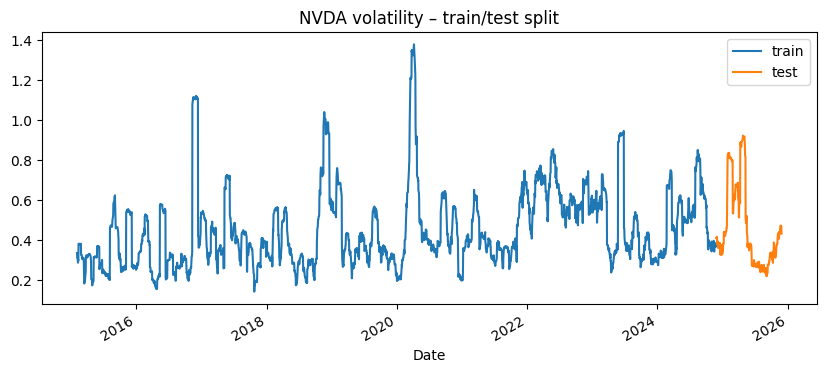

In [10]:
TEST_DAYS = 252   # roughly 1 trading year

train = series.iloc[:-TEST_DAYS]
test  = series.iloc[-TEST_DAYS:]

print(len(train), len(test))
train.plot(label="train")
test.plot(label="test")
plt.legend()
plt.title(f"{ticker} volatility – train/test split")
plt.show()

In [11]:
order = (1, 0, 1)   # ARIMA(p, d, q)

model = ARIMA(train, order=order)
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   NVDA   No. Observations:                 2470
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4329.910
Date:                Wed, 26 Nov 2025   AIC                          -8651.819
Time:                        14:56:30   BIC                          -8628.571
Sample:                             0   HQIC                         -8643.374
                               - 2470                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4494      0.041     11.048      0.000       0.370       0.529
ar.L1          0.9732      0.005    201.248      0.000       0.964       0.983
ma.L1          0.0620      0.028      2.245      0.0

/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/coursework/.venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/coursework/.venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/coursework/.venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/Users/oorjitchowdhary/Documents/UW/Fall 2025/ECE 344/coursework/.venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


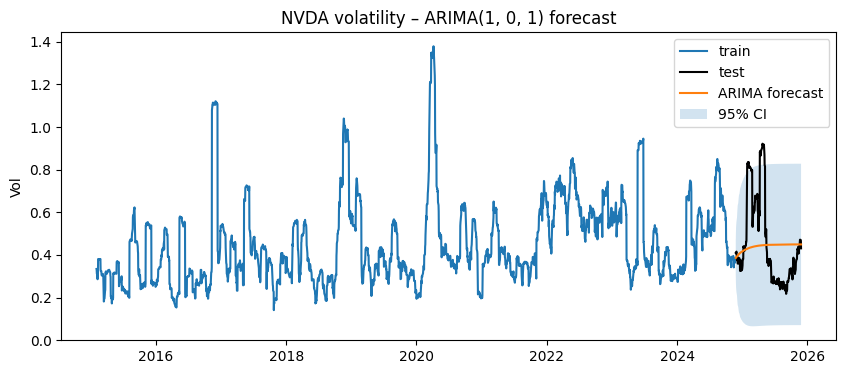

In [14]:
n_test = len(test)

forecast_res = model_fit.get_forecast(steps=n_test)
forecast_mean = forecast_res.predicted_mean
forecast_ci = forecast_res.conf_int(alpha=0.05)  # 95% interval

# Align index with test
forecast_mean.index = test.index
forecast_ci.index = test.index

plt.plot(train.index, train, label="train")
plt.plot(test.index, test, label="test", color="black")
plt.plot(forecast_mean.index, forecast_mean, label="ARIMA forecast")

plt.fill_between(
    forecast_ci.index,
    forecast_ci["lower NVDA"],
    forecast_ci["upper NVDA"],
    alpha=0.2,
    label="95% CI"
)

plt.title(f"{ticker} volatility – ARIMA{order} forecast")
plt.ylabel("Vol")
plt.legend()
plt.show()

In [15]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

mae_val = mae(test, forecast_mean)
rmse_val = rmse(test, forecast_mean)

print("MAE:", mae_val)
print("RMSE:", rmse_val)


MAE: 0.16638002374340136
RMSE: 0.20973695371441728


In [16]:
results = pd.DataFrame(
    {
        "ticker": [ticker],
        "model": [f"ARIMA{order}"],
        "mae": [mae_val],
        "rmse": [rmse_val],
    }
)

results.to_csv("data/processed/arima_results_single.csv", index=False)
results

,ticker,model,mae,rmse
0,NVDA,"ARIMA(1, 0, 1)",0.16638,0.209737
